---
# **1. Installation**
---

In [ ]:
!pip install nltk
!pip3 install flair
!pip install textblob

!pip install stanza
!pip install spacy

     |████████████████████████████████| 245kB 3.3MB/s 
     |████████████████████████████████| 1.1MB 7.2MB/s 
     |████████████████████████████████| 798kB 20.2MB/s 
     |████████████████████████████████| 983kB 26.4MB/s 
     |████████████████████████████████| 71kB 9.3MB/s 
     |████████████████████████████████| 276kB 44.2MB/s 
     |████████████████████████████████| 778kB 36.1MB/s 
     |████████████████████████████████| 19.7MB 245kB/s 
     |████████████████████████████████| 3.0MB 58.7MB/s 
     |████████████████████████████████| 890kB 59.2MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-cp36-none-any.whl size=116677 sha256=da09da130d97cfcca2f5b0369bf8aee191d803009550de123a8bdc4c2bf5171e
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cefdf6ba28
  Created wheel for segtok: filename=segtok-1.5.10-cp36-none-any.whl size=25021 sha256=e368e86711d8a9b776b26f6b8f874d64ce476be426ba51bdee3f122de6860dbd
  Stored in directory: /root/.cache/p

---
# **2. Imports**
---

### i. core

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### ii. NLTK Vader Sentiment Intensity Analyzer

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
SIA = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


### iii. Stanza

In [ ]:
import stanza
stanza.download('en', package='ewt', processors='tokenize,sentiment', verbose=True)
stanza.download('en', package='default', processors='tokenize,sentiment', verbose=True)
stNLP = stanza.Pipeline(processors='tokenize,sentiment', lang='en', use_gpu=True)

2020-08-31 02:06:01 WARNING: Can not find sentiment: ewt from official model list. Ignoring it.
2020-08-31 02:06:01 INFO: Downloading these customized packages for language: en (English)...
| Processor | Package |
-----------------------
| tokenize  | ewt     |

2020-08-31 02:06:03 INFO: Finished downloading models and saved to /root/stanza_resources.
2020-08-31 02:06:03 INFO: Downloading these customized packages for language: en (English)...
| Processor | Package |
-----------------------
| tokenize  | ewt     |
| sentiment | sstplus |
| pretrain  | ewt     |

2020-08-31 02:06:03 INFO: File exists: /root/stanza_resources/en/tokenize/ewt.pt.
2020-08-31 02:06:13 INFO: Finished downloading models and saved to /root/stanza_resources.
2020-08-31 02:06:13 INFO: Loading these models for language: en (English):
| Processor | Package |
-----------------------
| tokenize  | ewt     |
| sentiment | sstplus |

2020-08-31 02:06:13 INFO: Use device: cpu
2020-08-31 02:06:13 INFO: Loading: tokenize


### iv. Spacy Text Categorizer

In [ ]:
import random
import spacy
from spacy.util import minibatch
from spacy.pipeline import TextCategorizer
spacy.prefer_gpu()

TRAIN_DATA = [
    ["My little kitty is so special", {"Cat": True}],
    ["Dude, Totally, Yeah, Video Games", {"Cat": False}],
    ["Should I pay $1,000 for the iPhone X?", {"Cat": False}],
    ["The iPhone 8 reviews are here", {"Cat": False}],
    ["Noa is a great cat name.", {"Cat": True}],
    ["We got a new kitten!", {"Cat": True}]
]

nlp = spacy.load("en_core_web_sm")
category = nlp.create_pipe("textcat", config={"exclusive_classes": True})
nlp.add_pipe(category)

# add label to text classifier
category.add_label("Cat")
category.add_label('False')

optimizer = nlp.begin_training()
losses = {}

for i in range(100):
    random.shuffle(TRAIN_DATA)

    for batch in minibatch(TRAIN_DATA, size=8):
        texts = [nlp(text) for text, entities in batch]
        annotations = [{"cats": entities} for text, entities in batch]
        nlp.update(texts, annotations, sgd=optimizer, losses=losses)
    print(i, losses)

0 {'tagger': 0.4249240458011627, 'parser': 0.0, 'ner': 0.0, 'textcat': 0.0069444444961845875}
1 {'tagger': 0.42840023059397936, 'parser': 0.0, 'ner': 0.0, 'textcat': 0.013874517753720284}
2 {'tagger': 0.4284789489756804, 'parser': 0.0, 'ner': 0.0, 'textcat': 0.02072548307478428}
3 {'tagger': 0.4284858064092987, 'parser': 0.0, 'ner': 0.0, 'textcat': 0.027397735510021448}
4 {'tagger': 0.4284890801175152, 'parser': 0.0, 'ner': 0.0, 'textcat': 0.03380609303712845}
5 {'tagger': 0.4284920727411645, 'parser': 0.0, 'ner': 0.0, 'textcat': 0.039847421925514936}
6 {'tagger': 0.4284947697190091, 'parser': 0.0, 'ner': 0.0, 'textcat': 0.04546504095196724}
7 {'tagger': 0.4284967361222698, 'parser': 0.0, 'ner': 0.0, 'textcat': 0.05062930705025792}
8 {'tagger': 0.4284979313291615, 'parser': 0.0, 'ner': 0.0, 'textcat': 0.0553169478662312}
9 {'tagger': 0.42849859214089747, 'parser': 0.0, 'ner': 0.0, 'textcat': 0.05952265299856663}
10 {'tagger': 0.42849895078131794, 'parser': 0.0, 'ner': 0.0, 'textcat': 0

In [ ]:
doc = nlp(u'This is my cat called kittens the kitty')
print(doc.cats)

{'Cat': 0.9882165789604187, 'False': 0.011783416382968426}


In [ ]:
TRAIN_DATA = [
    ("beef", {"cats": {"POSITIVE": 1.0, "NEGATIVE": 0.0}}),
    ("apple", {"cats": {"POSITIVE": 0, "NEGATIVE": 1}})
]

In [ ]:
otro = nlp(u"Dude, Totally, Yeah, Video Games")
print(otro.cats)

{'Cat': 0.00010103267413796857, 'False': 0.9998989105224609}


### v. TextBlob

In [ ]:
from textblob import TextBlob

### vi. Flair

In [ ]:
import flair
flair_sent = flair.models.TextClassifier.load('en-sentiment')

2020-08-31 02:06:38,357 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert.pt not found in cache, downloading to /tmp/tmp8aipc6yg


100%|██████████| 266170364/266170364 [00:12<00:00, 21692275.07B/s]

2020-08-31 02:06:51,180 copying /tmp/tmp8aipc6yg to cache at /root/.flair/models/sentiment-en-mix-distillbert.pt


2020-08-31 02:06:51,656 removing temp file /tmp/tmp8aipc6yg
2020-08-31 02:06:51,684 loading file /root/.flair/models/sentiment-en-mix-distillbert.pt


---
# **3. Defining functions**
---

In [ ]:
def siaVader_compound(text):
    scores = SIA.polarity_scores(text)
    
    comp_score = scores['compound']
    if comp_score >= 0.05:
        str_comp = 'pos'
    elif comp_score <= -0.05:
        str_comp = 'neg'
    else: # (compound score > -0.05) and (compound score < 0.05)
        str_comp = 'neu'
    return str_comp

def siaVader_maxScore(text):
    scores = SIA.polarity_scores(text)
    
    del scores['compound']
    index = np.argmax(list(scores.values()))
    vader_MaxScore = list(scores.values())[index]
    vader_label = list(scores)[index]
    
    return vader_label

###
def siaVader_byWord(text):
    c = 0
    for n, y in enumerate(text):
        x = SIA.polarity_scores(y)
        if x['compound'] != 0.0:
            c += 1
            # print('{}. {} {}'.format(c, x, y))
            return 'pos' if x > 0.05 else 'neg'

In [ ]:
def text_blob_subjective(text):
    return TextBlob(text).sentiment

In [ ]:
def flair_lstm(text):
    x = flair.data.Sentence(text)
    flair_sent.predict(sentences=x)
    return x.labels

In [ ]:
def stanza_funct(text):
    data = stNLP(text)
    for sentence in data.sentences:
        return sentence.sentiment

---

# **4. Comparing Sentiment Analyzers**

---

### **data (text)**

In [ ]:
data = [
        'not confident',
        'unsure',
        'does not handles pressure',
        'disordered',
        'talks too much',
        'uninsterested',
        'sad',
        'unfriendly',
        
        'confident',
        'certain',
        'handles pressure',
        'organized',
        'concise',
        'interested',
        'happy',
        'friendly'
        ]     

In [ ]:
#data = "I'm confident of myself but sometimes I'm unsure and unfriendly however I'm concise when I'm interested in being someone organizated who handles pressure"
#data = data.split()

### **NLTK Vader**
* VADER, has different ratings depending on the form of the word and therefore the input should not be stemmed or lemmatized.

* disadvantage of this approach is that Out of Vocab (OOV) words that the sentiment analysis tool has not seen before will not be classified as positive/negative (e.g. typos).

In [ ]:
SIA.polarity_scores(' '.join(data))

{'compound': 0.6553, 'neg': 0.271, 'neu': 0.299, 'pos': 0.43}

In [ ]:
print(data)
print([(lambda x: SIA.polarity_scores(x)['compound'])(x) for x in data])

['not confident', 'unsure', 'does not handles pressure', 'disordered', 'talks too much', 'uninsterested', 'sad', 'unfriendly', 'confident', 'certain', 'handles pressure', 'organized', 'concise', 'interested', 'happy', 'friendly']
[-0.3875, -0.25, 0.2235, 0.0, 0.0, 0.0, -0.4767, -0.3612, 0.4939, 0.2732, -0.296, 0.0, 0.0, 0.4019, 0.5719, 0.4939]


In [ ]:
siaVader_compound(' '.join(data))

'pos'

In [ ]:
print(data)
print([(lambda x: siaVader_compound(x))(x) for x in data])

['not confident', 'unsure', 'does not handles pressure', 'disordered', 'talks too much', 'uninsterested', 'sad', 'unfriendly', 'confident', 'certain', 'handles pressure', 'organized', 'concise', 'interested', 'happy', 'friendly']
['neg', 'neg', 'pos', 'neu', 'neu', 'neu', 'neg', 'neg', 'pos', 'pos', 'neg', 'neu', 'neu', 'pos', 'pos', 'pos']


In [ ]:
siaVader_maxScore(' '.join(data))

'pos'

In [ ]:
print(data)
print([(lambda x: siaVader_maxScore(x))(x) for x in data])

['not confident', 'unsure', 'does not handles pressure', 'disordered', 'talks too much', 'uninsterested', 'sad', 'unfriendly', 'confident', 'certain', 'handles pressure', 'organized', 'concise', 'interested', 'happy', 'friendly']
['neg', 'neg', 'neu', 'neu', 'neu', 'neu', 'neg', 'neg', 'pos', 'pos', 'neg', 'neu', 'neu', 'pos', 'pos', 'pos']


## **TextBlob**
* use a bag of words classifier, but the advantage is that it includes subjetivity analysis (factual/opinated)
* it doesn't contain the heuristics that nltk has, it won't intensify or negate a sentence's sentiment

* will return the subjectivity of the text

In [ ]:
text_blob_subjective(' '.join(data))

Sentiment(polarity=0.1876984126984127, subjectivity=0.6708994708994709)

In [ ]:
[(lambda x: text_blob_subjective(x))(x) for x in data]

[Sentiment(polarity=-0.25, subjectivity=0.8333333333333334),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.2, subjectivity=0.2),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=-0.5, subjectivity=1.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.5, subjectivity=0.8333333333333334),
 Sentiment(polarity=0.21428571428571427, subjectivity=0.5714285714285714),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.1, subjectivity=0.6),
 Sentiment(polarity=0.25, subjectivity=0.5),
 Sentiment(polarity=0.8, subjectivity=1.0),
 Sentiment(polarity=0.375, subjectivity=0.5)]

## **Flair LSTM**
* classifier based on a character-leval LSTM. Takes a sequences of letters and words into account when predicting

* one of its biggest advantages is that it can predict a sentiment for OOV words that it has never seen before too (such as typos)

In [ ]:
flair_lstm(' '.join(data))

[NEGATIVE (0.9971)]

In [ ]:
print(data)
[(lambda x: flair_lstm(x))(x) for x in data]

['not confident', 'unsure', 'does not handles pressure', 'disordered', 'talks too much', 'uninsterested', 'sad', 'unfriendly', 'confident', 'certain', 'handles pressure', 'organized', 'concise', 'interested', 'happy', 'friendly']


[[NEGATIVE (0.9999)],
 [NEGATIVE (0.9923)],
 [NEGATIVE (0.9999)],
 [NEGATIVE (0.9998)],
 [NEGATIVE (0.9933)],
 [NEGATIVE (0.9997)],
 [NEGATIVE (0.9987)],
 [NEGATIVE (0.9985)],
 [POSITIVE (0.9971)],
 [POSITIVE (0.9888)],
 [POSITIVE (0.9928)],
 [POSITIVE (0.996)],
 [POSITIVE (0.9949)],
 [POSITIVE (0.9967)],
 [POSITIVE (0.9839)],
 [POSITIVE (0.9793)]]

## **Stanza**
* stanza pipeline by using a CNN classifier.
* training this model on 2 class data using higher dimension word vectors achieves the 87 score reported in the original CNN classifier paper. On a three class projection of the SST test data, the model trained on multiple datasets gets 70.0%.

In [ ]:
# 0 : neutral
# 1 : negative
# 2 : positive
print(data)
[(lambda x: stanza_funct(x))(x) for x in data]

['not confident', 'unsure', 'does not handles pressure', 'disordered', 'talks too much', 'uninsterested', 'sad', 'unfriendly', 'confident', 'certain', 'handles pressure', 'organized', 'concise', 'interested', 'happy', 'friendly']


[0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 1, 1, 2, 2, 2]

---
# **5. Graphs**
---

### **X, Y**

In [ ]:
x_plots = data

In [ ]:
y_flair_scores = np.array([x for b in [list(map(lambda x: x.score, score)) for score in [(lambda x: flair_lstm(x))(x) for x in data]] for x in b])

In [ ]:
y_flair_values_aux = [x for b in [list(map(lambda x: x.value, value)) for value in [(lambda x: flair_lstm(x))(x) for x in data]] for x in b]
y_flair_values = []
for i in y_flair_values_aux:
    if i == 'POSITIVE': 
        y_flair_values.append(1)
    else:
        y_flair_values.append(-1)
y_flair_values = np.array(y_flair_values)

In [ ]:
y_textblob_sentiment = np.array([(lambda x: text_blob_subjective(x)[0])(x) for x in data])
y_textblob_subjectivity = np.array([(lambda x: text_blob_subjective(x)[1])(x) for x in data])

In [ ]:
y_vader = [(lambda x: SIA.polarity_scores(x)['compound'])(x) for x in data]
y_vader = np.array(y_vader)

In [ ]:
y_stanza_1 = [(lambda x: stanza_funct(x))(x) for x in data]
y_stanza = []
for i in y_stanza_1:
    if i == 2:
        y_stanza.append(1)
    elif i == 1:
        y_stanza.append(0)
    else:
        y_stanza.append(-1)
y_stanza = np.array(y_stanza)

### **Numpy Array Results**

In [ ]:
y_flair_values

array([-1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
y_flair_scores

array([0.99985647, 0.99227095, 0.99994195, 0.99975961, 0.99328858,
       0.9997341 , 0.99871314, 0.99850661, 0.99709618, 0.98880416,
       0.99275267, 0.99604756, 0.99489647, 0.9967128 , 0.98393667,
       0.97929859])

In [ ]:
y_textblob_sentiment

array([-0.25      ,  0.        ,  0.        ,  0.        ,  0.2       ,
        0.        , -0.5       ,  0.        ,  0.5       ,  0.21428571,
        0.        ,  0.        ,  0.1       ,  0.25      ,  0.8       ,
        0.375     ])

In [ ]:
y_textblob_subjectivity

array([0.83333333, 0.        , 0.        , 0.        , 0.2       ,
       0.        , 1.        , 0.        , 0.83333333, 0.57142857,
       0.        , 0.        , 0.6       , 0.5       , 1.        ,
       0.5       ])

In [ ]:
y_stanza

array([-1,  0, -1,  0, -1,  0, -1, -1,  1,  1,  0,  0,  0,  1,  1,  1])

## **Plotting bars**

In [ ]:
def plot_bar(p1y, p2y, p3y, p4y, p5y, x, size):
    plt.figure(figsize=size)
    plt.bar(x, p1y, label='Flair', color='red')
    plt.bar(x, p2y, label='TextBlob', color='blue')
    plt.bar(x, p3y, label='Subjectivity', color='purple')
    plt.bar(x, p4y, label='Vader', color='green')
    plt.bar(x, p5y, label='Stanza', color='grey')
    plt.title('NLP SCORES PREDICTION vs WORDS')
    plt.xlabel('SENTENCE')
    plt.ylabel('SCORES')
    plt.legend(loc='upper left')
    plt.xticks(rotation='vertical')
    plt.tight_layout()
    plt.grid(True)

    plt.show()

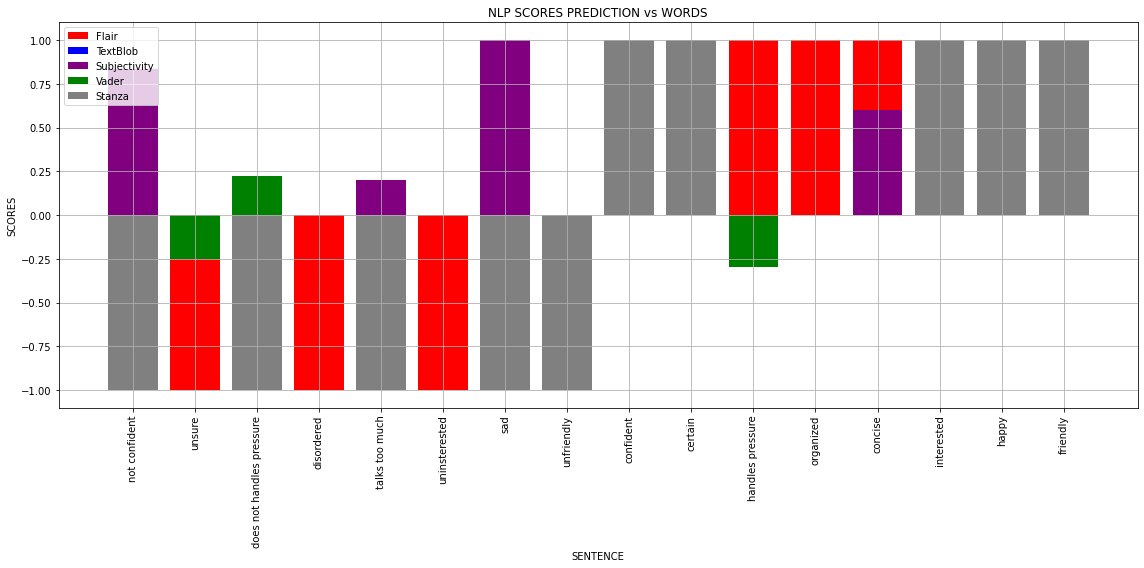

In [ ]:
plot_bar(
    p1y=y_flair_values,
    p2y=y_textblob_sentiment,
    p3y=y_textblob_subjectivity,
    p4y=y_vader,
    p5y=y_stanza,
    x=x_plots,
    size=(16,  8)
)

## **Plotting lines**

In [ ]:
def plot_lines(p1y, p2y, p3y, p4y, p5y, x, size):
    plt.figure(figsize=size)
    plt.plot(x, p1y, linestyle='solid', color='red', label='Flair')
    plt.plot(x, p2y, linestyle='solid', color='blue', label='TextBlob')
    plt.plot(x, p3y, linestyle='dashed', color='purple', label='Subjectivity')
    plt.plot(x, p4y, linestyle='solid', color='green', label='Vader')
    plt.plot(x, p5y, linestyle='solid', color='black', label='Stanza')
    plt.title('NLP SCORES PREDICTION vs WORDS')
    plt.xlabel('SENTENCE')
    plt.ylabel('SCORES')
    plt.legend()
    plt.xticks(size=10, rotation='vertical')
    plt.yticks(size=10)
    plt.grid(True)
    
    plt.show()

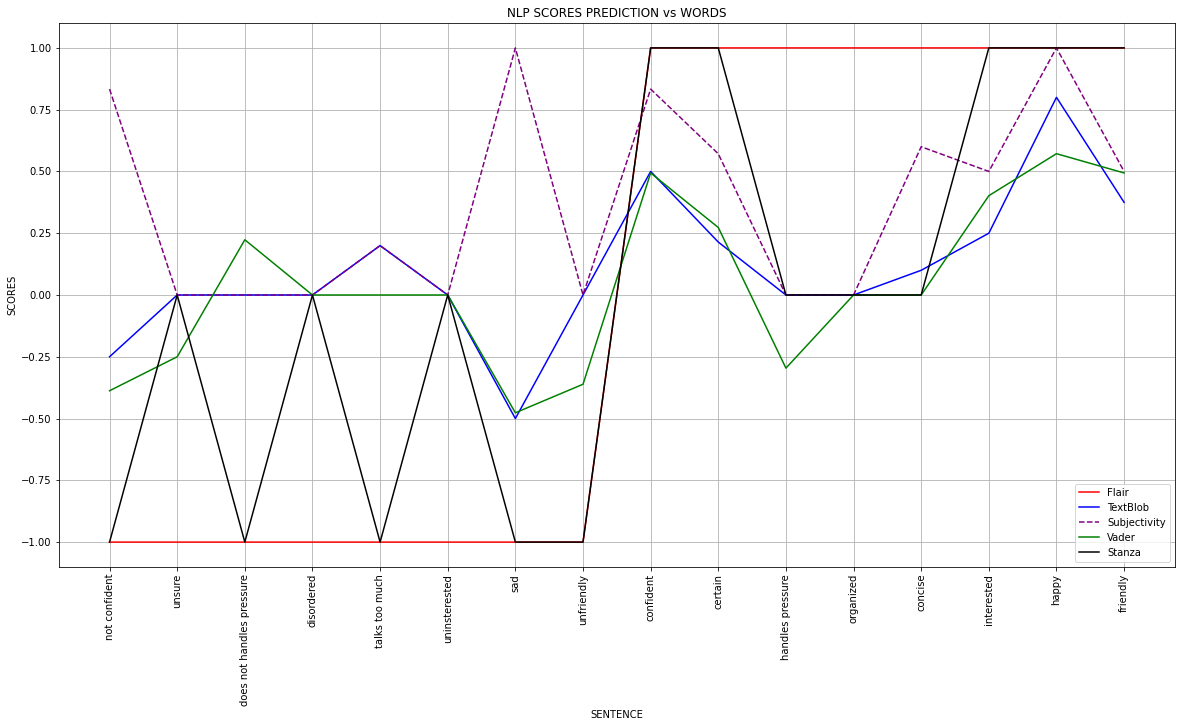

In [ ]:
plot_lines(
    p1y=y_flair_values,
    p2y=y_textblob_sentiment,
    p3y=y_textblob_subjectivity,
    p4y=y_vader,
    p5y=y_stanza,
    x=x_plots,
    size=(20,  10)
)

In [ ]:
def plot_flair(x, y):
    plt.figure(figsize=(10, 8))
    plt.plot(x, y, linestyle='solid', color='red', label='Flair')
    plt.title('Flair LSTM accuracy')
    plt.xlabel('SENTENCE')
    plt.ylabel('ACCURACY')
    plt.legend()
    plt.xticks(size=10, rotation='vertical')
    plt.yticks(size=10)
    plt.grid(True)
    
    plt.show()

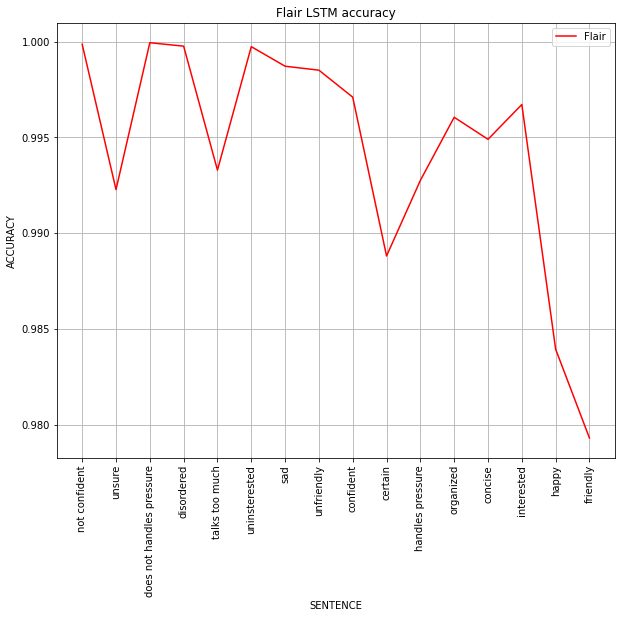

In [ ]:
plot_flair(x_plots, y_flair_scores)

---
# **6. Brief positive conclusion**
---

1. **Flair** is great because the properties of the LSTM model: takes into account sequences of letters and words when predicting
2. **TextBlob** subjectivity works great
3. **Vader** & **Stanza (CNN)** are great to detect particular and intense positive or negative words

---

## To-do:
* SpaCy categorization
---